In [1]:
#load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# read the data

df = pd.read_csv('../../Mall Customer Segmentation.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We can see our data set consists of only a few columns where all variables could impact the mall's potential sales. Let's see if we can break out key groups to find target marketing clusters.

# Univariate Analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The  average age in our data set is 38 with a  60k salary.

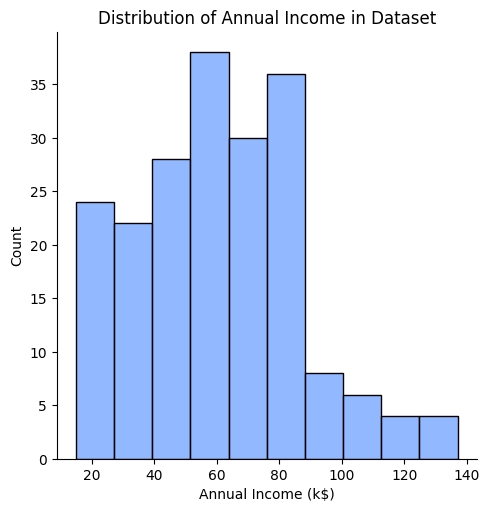

In [4]:
#let's create a histogram of one of our variables to see how its distributed

annual_income_chart = sns.displot(data=df['Annual Income (k$)'], color='#6ea0ff').set(title='Distribution of Annual Income in Dataset')

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

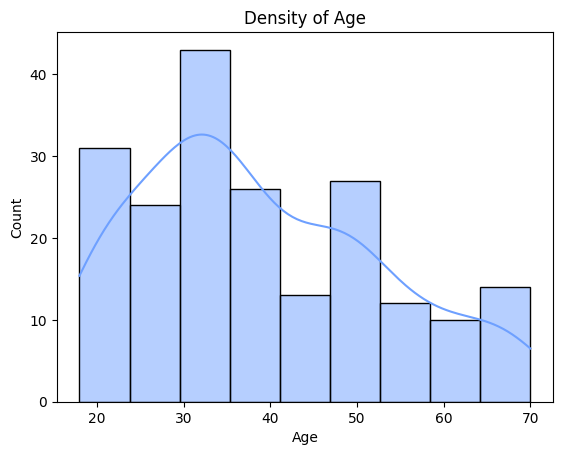

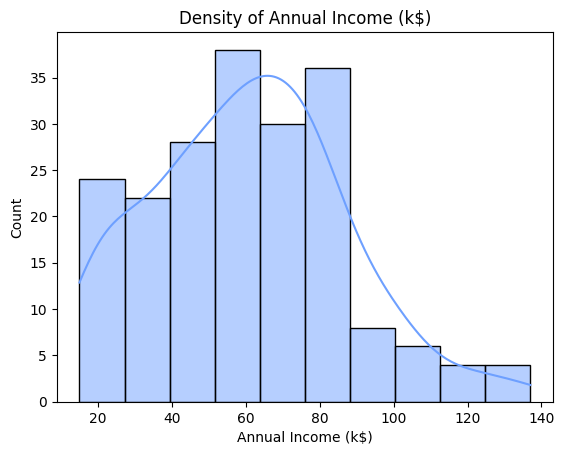

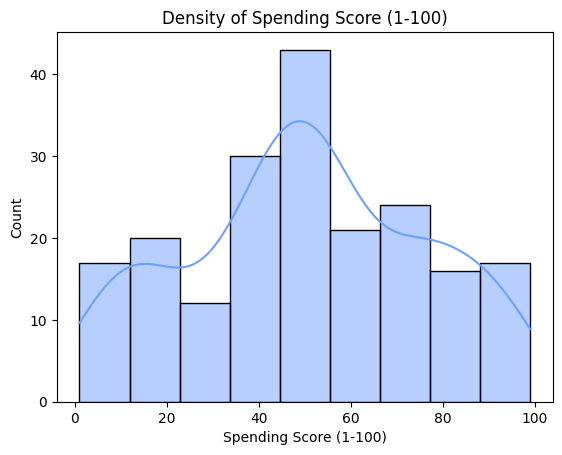

In [5]:
#we must exclude gender when creating these plots since gender is a object data type

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]
for col in columns: 
    plt.figure()
    sns.histplot(df[col], kde=True, color='#6ea0ff').set(title=(f"Density of {col}"))

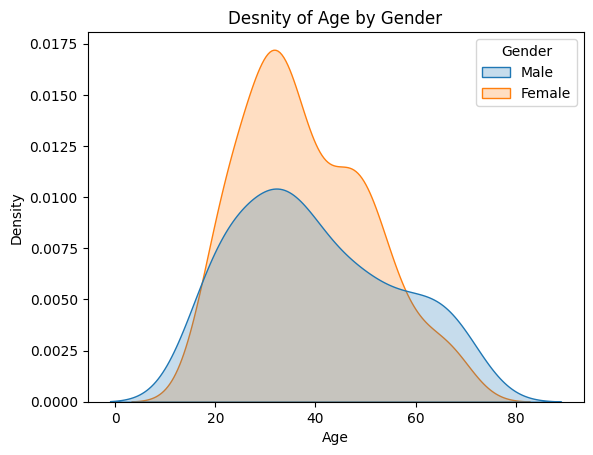

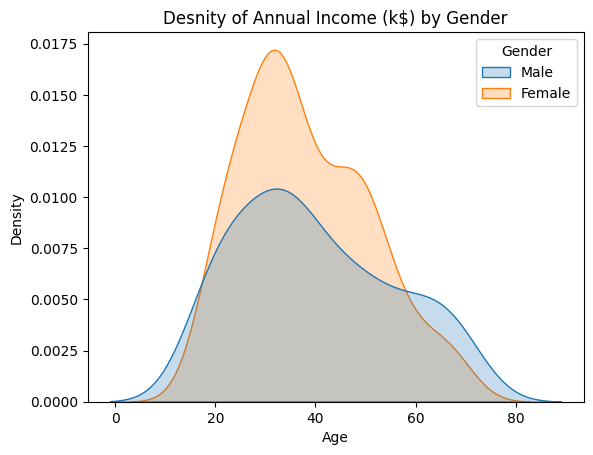

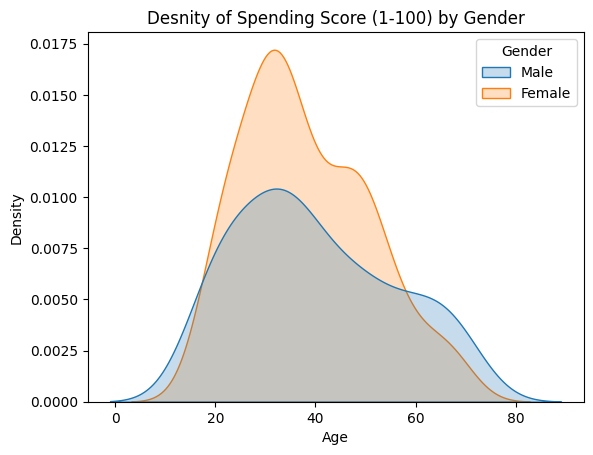

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]
for col in columns: 
    plt.figure()
    sns.kdeplot(df.reset_index(drop=True), x=df['Age'], hue='Gender', fill=True).set(title=f'Desnity of {col} by Gender')


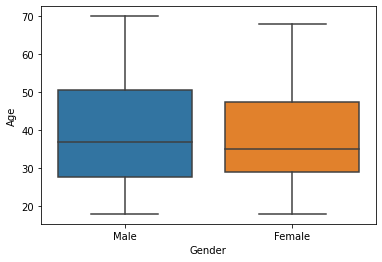

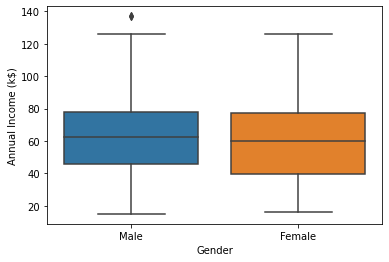

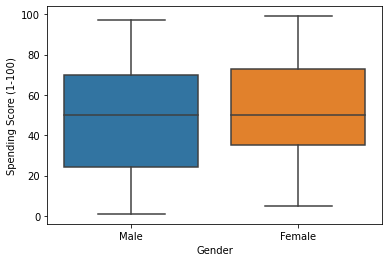

In [11]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]
for col in columns: 
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[col])

In [12]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [13]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

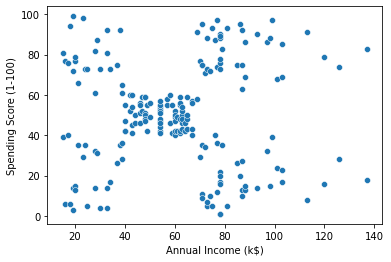

In [14]:
sns.scatterplot(data=df, x= 'Annual Income (k$)', y='Spending Score (1-100)');

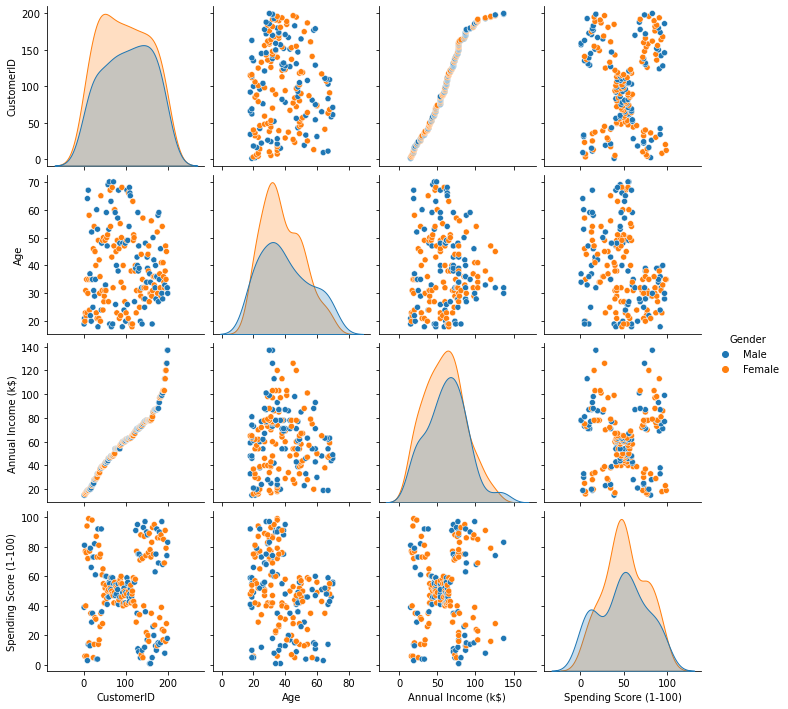

In [15]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue = 'Gender');

In [16]:
df.groupby(['Gender']).mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [17]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

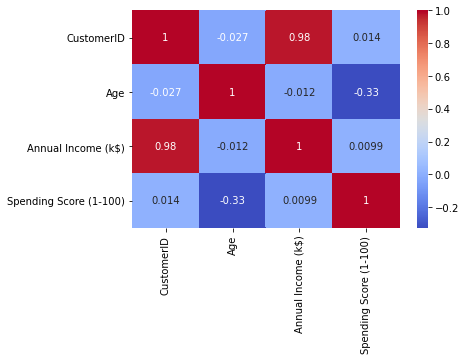

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clustering - Univariate, Bivariate, and Multivariate

In [19]:
cluster_uni = KMeans(n_clusters=3)

In [20]:
cluster_uni.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
cluster_uni.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [22]:
df['Income Cluster'] = cluster_uni.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [23]:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [24]:
cluster_uni.inertia_

23517.33093093092

In [25]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [26]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3931.9880952380995,
 2862.250427350428,
 2362.5124261187734,
 1838.6793226381453]

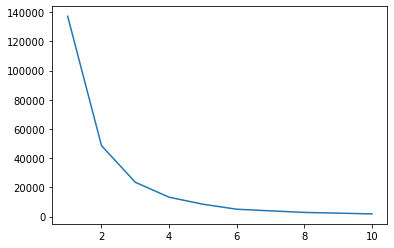

In [27]:
plt.plot(range(1,11), inertia_scores);

In [28]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-28-f9fe373c90b7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


# Bivariate Clustering

In [29]:
cluster_bi = KMeans(n_clusters=5)
cluster_bi.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = cluster_bi.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


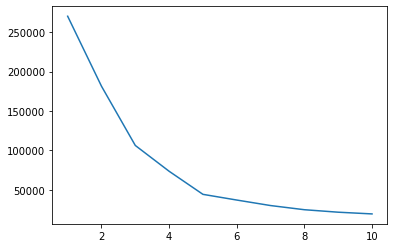

In [30]:
inertia_scores_bi = []
for i in range(1,11):
    kmeans_bi = KMeans(n_clusters=i)
    kmeans_bi.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores_bi.append(kmeans_bi.inertia_)
plt.plot(range(1,11), inertia_scores_bi);

In [31]:
inertia_scores_bi

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30259.657207285458,
 24990.434310396893,
 21841.978256748636,
 19672.07284901432]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

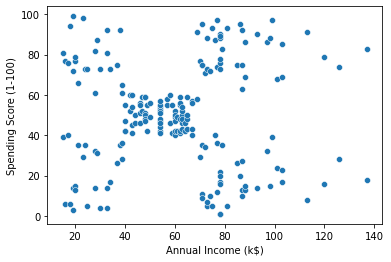

In [32]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [33]:
centers = pd.DataFrame(cluster_bi.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,26.304348,20.913043
4,88.200000,17.114286


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

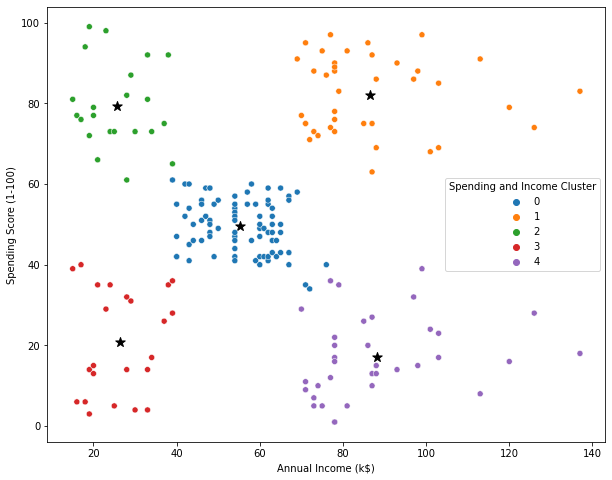

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

A target group would be cluster 3 since they have a high and and high spending score.
Since 54% of cluster 3 is women we should try a marketing campaign to target popular items in this cluster.
Cluster 2 has a high spending score but low annual income. A lot of poeple in cluster 2 could be spending their money on big ticket items like a new Xbox or something similar. We could target cluster 2 by marketing sales events on popular items.

In [35]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [36]:
df.groupby('Spending and Income Cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Spending and Income Cluster,,,,,
0,86.320988,42.716049,55.296296,49.518519,0.358025
1,162.000000,32.692308,86.538462,82.128205,0.923077
2,23.090909,25.272727,25.727273,79.363636,1.000000
3,23.000000,45.217391,26.304348,20.913043,1.000000
4,164.371429,41.114286,88.200000,17.114286,1.028571


# Multivariate Clustering

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scale = StandardScaler()

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


In [40]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,2,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,2,0
4,5,31,17,40,1,3,0


In [41]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [42]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [43]:
dff=pd.DataFrame(scale.fit_transform(dff))

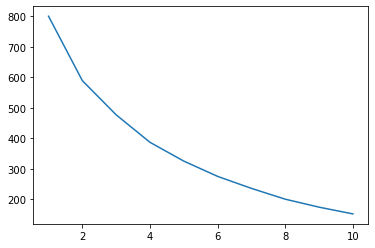

In [44]:
inertia_scores_multi = []
for i in range(1,11):
    kmeans_multi = KMeans(n_clusters=i)
    kmeans_multi.fit(dff)
    inertia_scores_multi.append(kmeans_multi.inertia_)
plt.plot(range(1,11), inertia_scores_multi);

In [45]:
cluster_multi = KMeans(n_clusters=4)
cluster_multi.fit(dff)
df['Multivariate Cluster'] = cluster_multi.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster
0,1,Male,19,15,39,1,3,2
1,2,Male,21,15,81,1,2,2
2,3,Female,20,16,6,1,3,3
3,4,Female,23,16,77,1,2,1
4,5,Female,31,17,40,1,3,1


In [46]:
df.groupby('Multivariate Cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
Multivariate Cluster,,,,,,
0,104.958333,49.437500,62.416667,29.208333,0.687500,2.083333
1,100.210526,28.438596,59.666667,67.684211,0.684211,0.947368
2,103.375000,28.250000,62.000000,71.675000,0.800000,0.975000
3,94.818182,48.109091,58.818182,34.781818,0.763636,1.800000
